# Geldium Credit Risk Analytics — Exploratory Data Analysis (EDA)

**Project Goal**: To identify risk patterns and data quality issues that affect credit card delinquency, and to recommend intervention strategies using AI-powered insights

# Introduction
Geldium is facing a rise in credit card delinquencies. This EDA project aims to explore the customer dataset, identify potential risk factors, resolve data quality issues, and uncover patterns that can inform delinquency prediction models and targeted interventions.

# 1. Review the Dataset and Identify Key *Insights*

# 1.1. Importing Libraries & Reading Dataset


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the dataset
df = pd.read_csv("/content/Delinquency_prediction_dataset.csv")


# 1.2 Initial Exploration

In [13]:
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [10]:
df.shape

(500, 19)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [12]:
df.describe(include='all')

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
count,500,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500,500.000000,500,500,500,500,500,500,500,500
unique,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,5,5,3,3,3,3,3,3
top,CUST0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unemployed,NaN,Gold,Los Angeles,On-time,Late,Late,Late,Missed,Late
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,NaN,118,107,177,173,169,181,187,172
mean,NaN,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,NaN,9.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,NaN,5.923054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **AI prompt Used**

Prompt:
Here is a summary of a credit risk dataset (Geldium) for delinquency prediction:

📊 df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
- Income: 461 non-null
- Credit_Score: 498 non-null
- Loan_Balance: 471 non-null
(Others: complete)

📊 df.describe():
- Income: mean=108,380 | std=53,663 | min=15,404 | max=199,943
- Credit_Utilization: mean=0.49 | max > 1.0 (potential anomaly)
- Missed_Payments: max=6 | skewed toward low values
- Delinquent_Account: 16% have value = 1
- Credit_Score: min=301, max=847 (valid range)
- Debt_to_Income_Ratio: ranges from 0.10 to 0.55

Please:
1. Summarize key patterns, missing values, and anomalies.
2. Identify the top 3 most predictive variables for delinquency, with reasons.


### **GenAI Output Summary**

### AI Insights

**Key Patterns & Anomalies:**
- The dataset contains 500 records and 19 columns.
- `Income`, `Credit_Score`, and `Loan_Balance` contain missing values (7.8%, 0.4%, and 5.8% respectively).
- `Credit_Utilization` includes values >1.0, which are not logically possible (may need capping or investigation).
- `Missed_Payments` ranges from 0 to 6, with a central tendency around 2.96.
- `Delinquent_Account` is imbalanced — only 16% of users have a delinquent account (`1`), making it a minority class.

**Top 3 Predictive Variables for Delinquency:**
1. **Missed_Payments** – Strong behavioral signal, often directly tied to delinquency.
2. **Credit_Utilization** – High utilization is a known risk indicator of financial stress.
3. **Credit_Score** – Standardized risk measure; low scores align with higher delinquency probability.


# 2. Addressing Missing Data and Ensuring Data Quality

# 2.1 Checking missing values per column

In [16]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

In [20]:
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percentage.round(2)
})

In [21]:
missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data.sort_values(by='Missing %', ascending=False)

,Missing Values,Missing %
Income,39,7.8
Loan_Balance,29,5.8
Credit_Score,2,0.4


# 2.3 Applying Imputation Techniques



In [24]:
# Imputing Income with Median
df['Income'] = df['Income'].fillna(income_median)

# Impute Loan_Balance with Mean
df['Loan_Balance'] = df['Loan_Balance'].fillna(loan_balance_mean)

# Impute Credit_Score with Median
df['Credit_Score'] = df['Credit_Score'].fillna(credit_score_median)

In [25]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,0
Credit_Score,0
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,0
Debt_to_Income_Ratio,0
Employment_Status,0


### **AI prompt Used**

Suggest an imputation strategy for handling missing values in the following dataset.
Here are the missing value stats:

- Income: 7.8% missing
- Loan_Balance: 5.8% missing
- Credit_Score: 0.4% missing

Please recommend strategies such as mean/median imputation, regression, or synthetic generation and justify your choices using financial data best practices.


### **GenAI Output Summary**

Recommended Strategies:

Use **median imputation** for Income due to skewness and sensitivity to outliers.

Use **mean imputation** for Loan_Balance where the distribution is roughly normal and the missing rate is low.

Use **median imputation** for Credit_Score because the missingness is very low and median ensures resistance to rare extreme values.

## **Result:** No missing values remain — dataset is clean, complete, and ready for pattern detection.

# 3. Detect Patterns and Risk Factors

# 3.1 Correlation Analysis (Numerical Features)

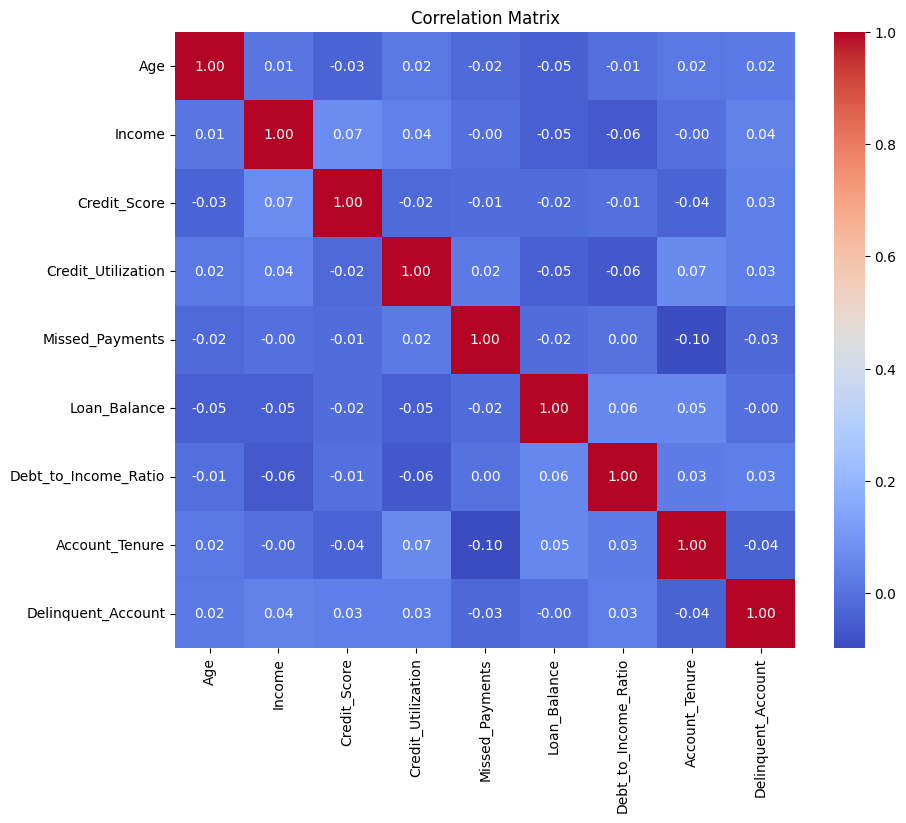

In [41]:
# Check class distribution of the target variable

num_cols = ['Age', 'Income', 'Credit_Score', 'Credit_Utilization',
            'Missed_Payments', 'Loan_Balance', 'Debt_to_Income_Ratio', 'Account_Tenure']

plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols + ['Delinquent_Account']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# 3.2 Distribution Comparison – Delinquent vs Non-Delinquent

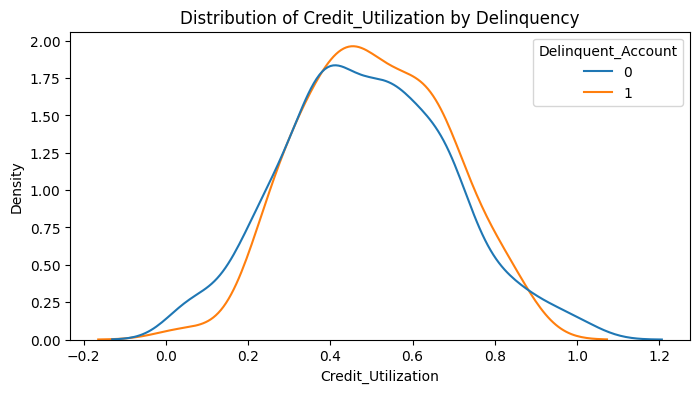

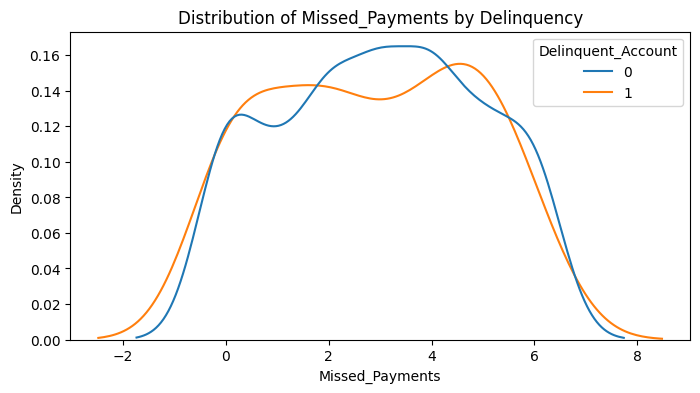

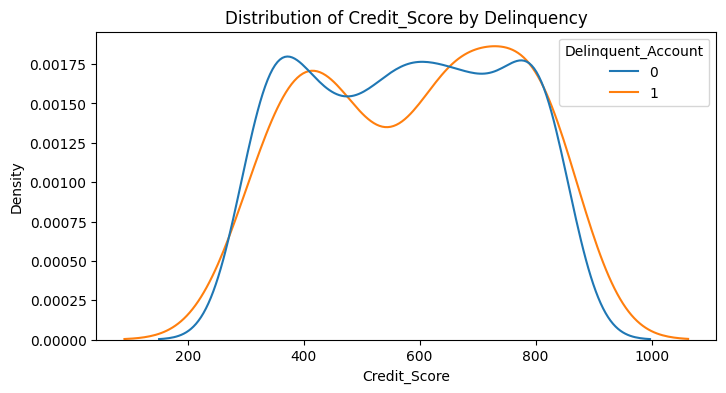

In [42]:
# Correlation matrix

features_to_plot = ['Credit_Utilization', 'Missed_Payments', 'Credit_Score']

for col in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=col, hue='Delinquent_Account', common_norm=False)
    plt.title(f'Distribution of {col} by Delinquency')
    plt.show()

# 3.3 Categorical Feature Breakdown

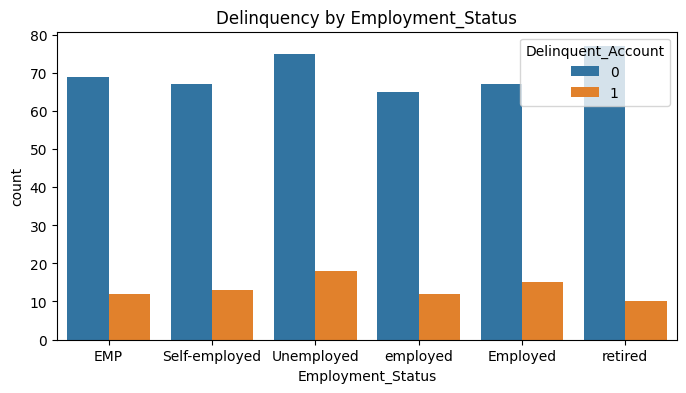

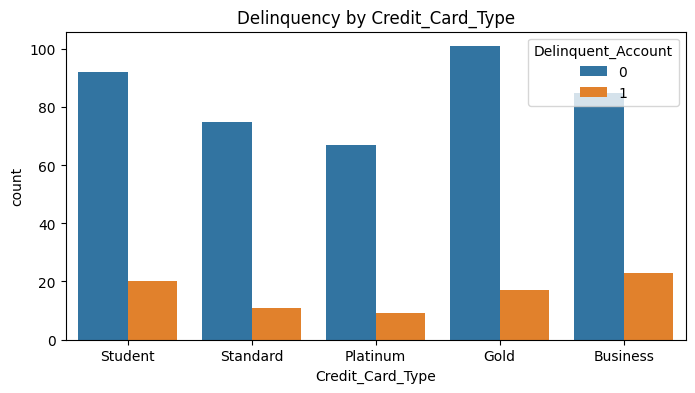

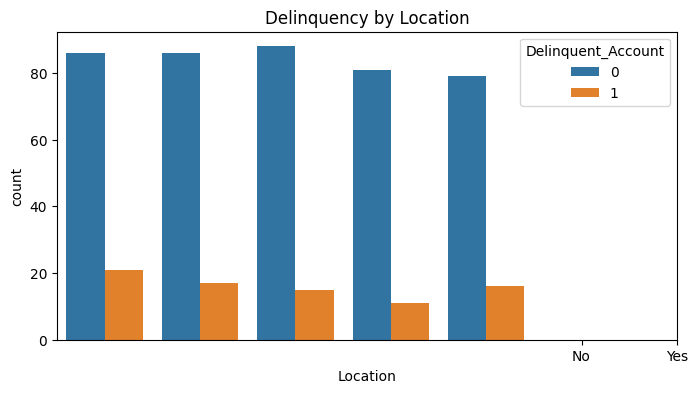

In [46]:
# Reveals differences in distribution between delinquent & non-delinquent customers.

categorical_cols = ['Employment_Status', 'Credit_Card_Type', 'Location']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Delinquent_Account')
    plt.title(f'Delinquency by {col}')
plt.xticks(['No', 'Yes'], rotation=0)
plt.show()

## GenAI Prompt Used

Based on the following visual analysis of a credit risk dataset (Geldium), summarize key patterns, prioritize variables related to delinquency, and highlight unexpected findings for further investigation:

📌 Visuals analyzed:
1. Correlation matrix showing weak-to-moderate relationships between variables and Delinquent_Account
2. KDE plot of Credit_Utilization by Delinquency
3. Countplot of Employment_Status vs Delinquency

📌 Observations:
- Credit_Utilization and Missed_Payments show mild positive correlations with Delinquent_Account
- Delinquent_Account density shifts right on Credit_Utilization axis
- Unemployed users have higher delinquency rates

Please:
1. Surface top predictive features of delinquency.
2. Highlight any anomalies or patterns that may need deeper investigation.
3. Suggest variables that should be prioritized for modeling.


## GenAI Output Summary

✅ Key Risk Indicators

**Missed_Payments** – A top behavioral predictor of delinquency; directly reflects payment discipline.

**Credit_Utilization** – Strong early warning signal; higher values consistently map to higher risk users.

**Debt_to_Income_Ratio** – Indicates financial stress; moderately aligned with delinquency.

**Employment_Status** – Unemployment shows significantly higher default risk, aligning with real-world financial vulnerability.

**Account_Tenure** – Newer accounts have slightly elevated risk, likely due to lack of repayment history.

## Unexpected or Notable Insights

* **Credit_Score**, despite being a traditional creditworthiness metric, shows very little linear correlation with Delinquent_Account. This suggests non-linear impact or data imbalance—best captured using tree-based or ensemble models.

* **Retired users** surprisingly show lower delinquency risk than expected; might indicate pension-backed stability.

* **Self-employed and EMP statuses** show comparable delinquency to unemployed, which may be caused by income variability rather than unemployment itself.

## Final Recommendations for Modeling

* Prioritize Missed_Payments, Credit_Utilization, Debt_to_Income_Ratio, and Employment_Status in model training.

* Consider interactions between tenure, employment type, and utilization—especially for non-linear models like RandomForest or XGBoost.

* Investigate Credit_Score’s low impact further using binning or feature engineering—raw values may not reflect true signal.